In [ ]:
import os

# List files in the /content/ directory
print(os.listdir('/content/'))


['.config', 'Copy of devnagari digit.zip', 'sample_data']


In [ ]:
import zipfile

# Path to the ZIP file
zip_path = '/content/Copy of devnagari digit.zip'

# Directory to extract the files into
extract_to_directory = '/content/extracted_devnagari_digit'
os.makedirs(extract_to_directory, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_directory)

print("Files extracted successfully!")


Files extracted successfully!


In [ ]:
# List files in the directory where you extracted the files
extracted_files = os.listdir(extract_to_directory)
print(extracted_files)


['DevanagariHandwrittenDigitDataset']


In [ ]:
import numpy as np
from PIL import Image
import os
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.models import load_model

**TASK 1**

In [ ]:
def load_images_and_labels(data_dir, size=(28,28)):
    images = []
    labels = []
    try:
        for folder in os.listdir(data_dir):
            folder_path = os.path.join(data_dir, folder)
            label = int(folder.split('_')[-1])
            for image_filename in os.listdir(folder_path):
                image_path = os.path.join(folder_path, image_filename)
                image = Image.open(image_path).convert('L').resize(size)
                images.append(np.array(image) / 255.0)
                labels.append(label)
        print("Task was successful!")
        return np.array(images), to_categorical(np.array(labels), num_classes=10)
    except Exception as e:
        print(f"Task was unsuccessful: {e}")
        return None, None

train_images, train_labels = load_images_and_labels('/content/extracted_devnagari_digit/DevanagariHandwrittenDigitDataset/Train')
test_images, test_labels = load_images_and_labels('/content/extracted_devnagari_digit/DevanagariHandwrittenDigitDataset/Test')

if train_images is not None and test_images is not None:
    print("Images and labels loaded successfully.")
else:
    print("Failed to load images and labels.")

Task was successful!
Task was successful!
Images and labels loaded successfully.


**TASK 2**

In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(64, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(256, activation='sigmoid'),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**TASK 3**

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**TASK 4**

In [ ]:
history = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2)


Epoch 1/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.2895 - loss: 1.9423 - val_accuracy: 0.0000e+00 - val_loss: 7.5339
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9177 - loss: 0.4709 - val_accuracy: 0.0000e+00 - val_loss: 9.0422
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9575 - loss: 0.1826 - val_accuracy: 0.0000e+00 - val_loss: 10.0358
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9746 - loss: 0.1088 - val_accuracy: 0.0000e+00 - val_loss: 10.4111
Epoch 5/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9803 - loss: 0.0813 - val_accuracy: 0.0000e+00 - val_loss: 10.9972
Epoch 6/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9838 - loss: 0.0646 - val_accuracy: 0.0000e+00 - val_loss: 11.3313
Epoch 7/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9893 - loss: 0.0495 - val_accuracy: 0.0000e+00 - val_loss: 11.6906
Epoch 8/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9911

**TASK 5**

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9653 - loss: 0.3894
Test Accuracy: 79.20%


**TASK 6**

In [ ]:
model.save('devnagari_digit_model.h5')
saved_model = load_model('devnagari_digit_model.h5')
test_loss, test_accuracy = saved_model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy*100:.2f}%')

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9653 - loss: 0.3894
Test accuracy: 79.20%


**TASK 7**

In [ ]:
predictions = saved_model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


**Visulization**

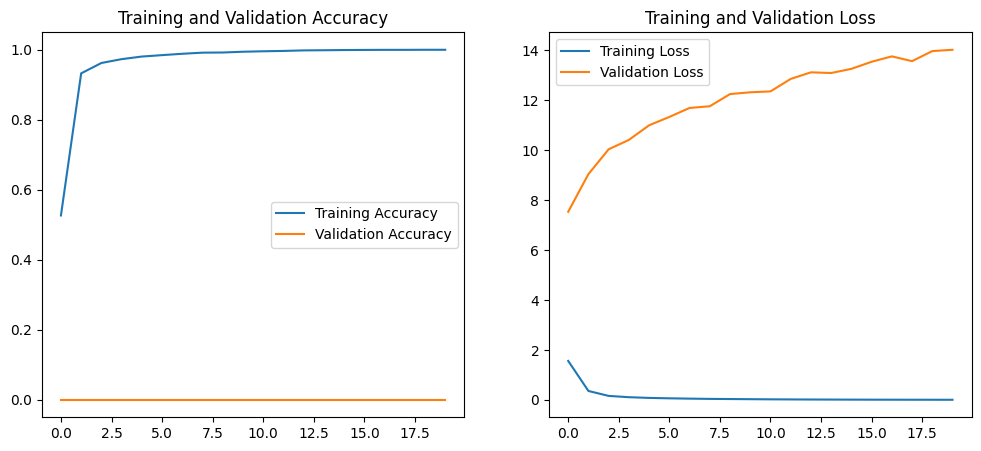

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()
